[1] "Best single recommender on mean absolute user error"


RS                        avg_error
1 BiasedMatrixFactorization 0.65678

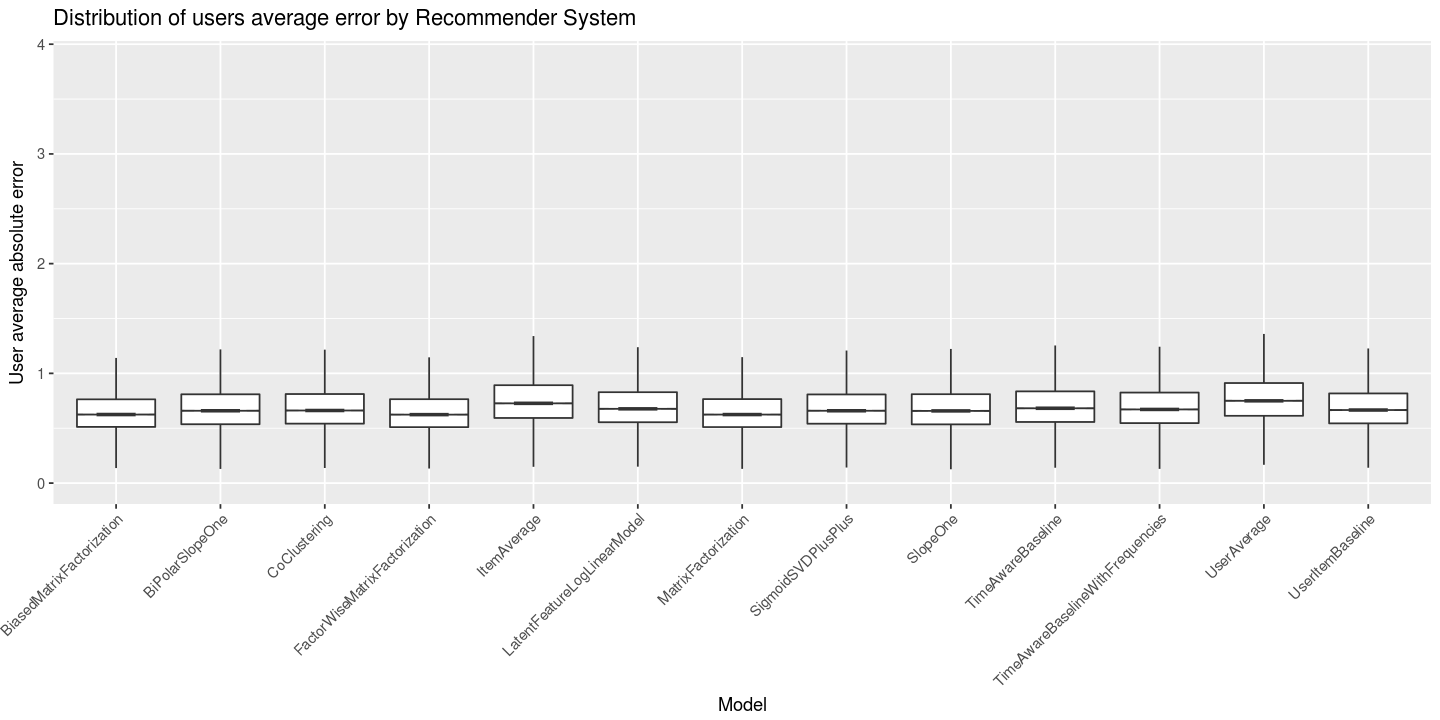

In [21]:
library(ggplot2)
require(gridExtra)
library(plyr)

### VISUALIZACAO 1 ###
df_errors = read.csv("/home/guz/personal/msc-gustavo-penha/data/created/user_avg_errors.csv")

print("Best single recommender on mean absolute user error")
means =  ddply(df_errors, .(RS),summarize, avg_error = mean(avg_error))
means[means$avg_error == min(means$avg_error),]

df_errors = df_errors[df_errors$RS!= "Constant",]
df_errors = df_errors[df_errors$RS!= "Constant5",]
df_errors = df_errors[df_errors$RS!= "Random",]
df_errors = df_errors[df_errors$RS!= "GlobalAverage",]

options(repr.plot.width=12, repr.plot.height=6)
g1 <- ggplot(df_errors, aes(x=RS,y=avg_error)) + 
  geom_boxplot(notch = TRUE,outlier.shape = NA) +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))+
  ylab("User average absolute error") + 
  xlab("Model")+
  ggtitle("Distribution of users average error by Recommender System") 
g1

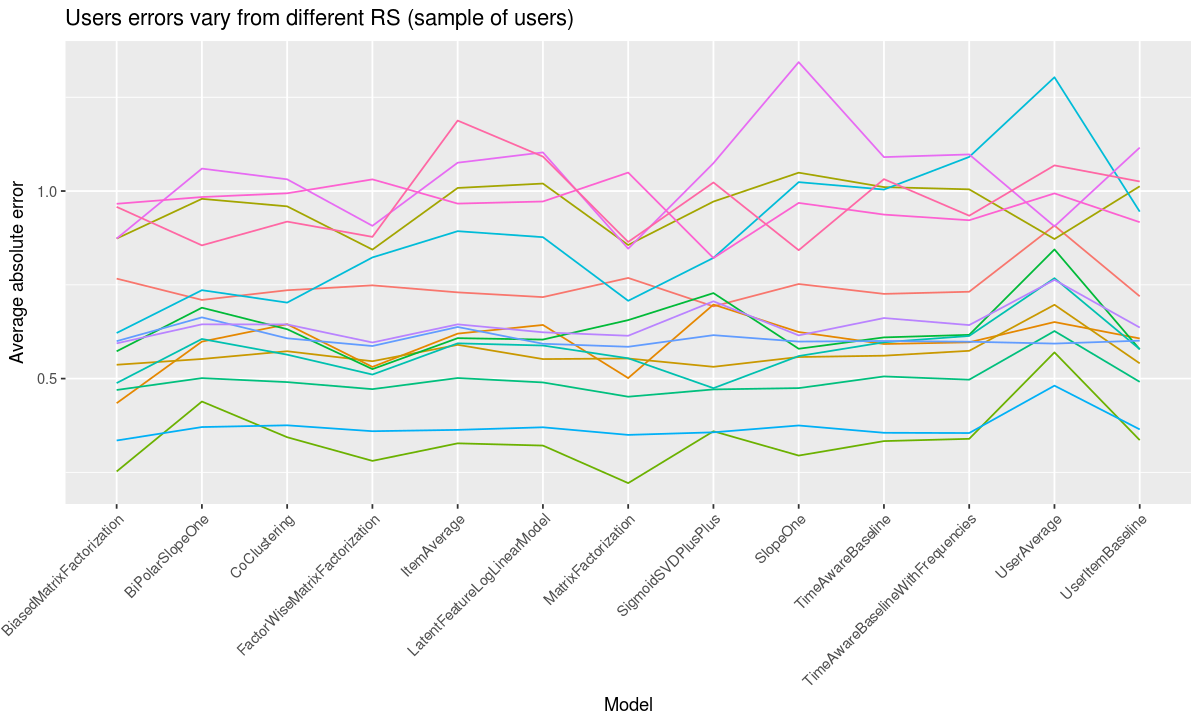

In [17]:
set.seed(1)
sampled_users = sample(18000, 15)
df_sampled = df_errors[df_errors$userId %in% sampled_users,]
df_sampled$userId = as.character(df_sampled$userId)

ggplot(df_sampled,aes(x = RS, y = avg_error))  +
  geom_path(aes(group=userId , color=userId))+
  theme(axis.text.x = element_text(angle = 45, hjust = 1))+ theme(legend.position="none") +
  ylab("Average absolute error") + 
  xlab("Model") + ggtitle("Users errors vary from different RS (sample of users)")

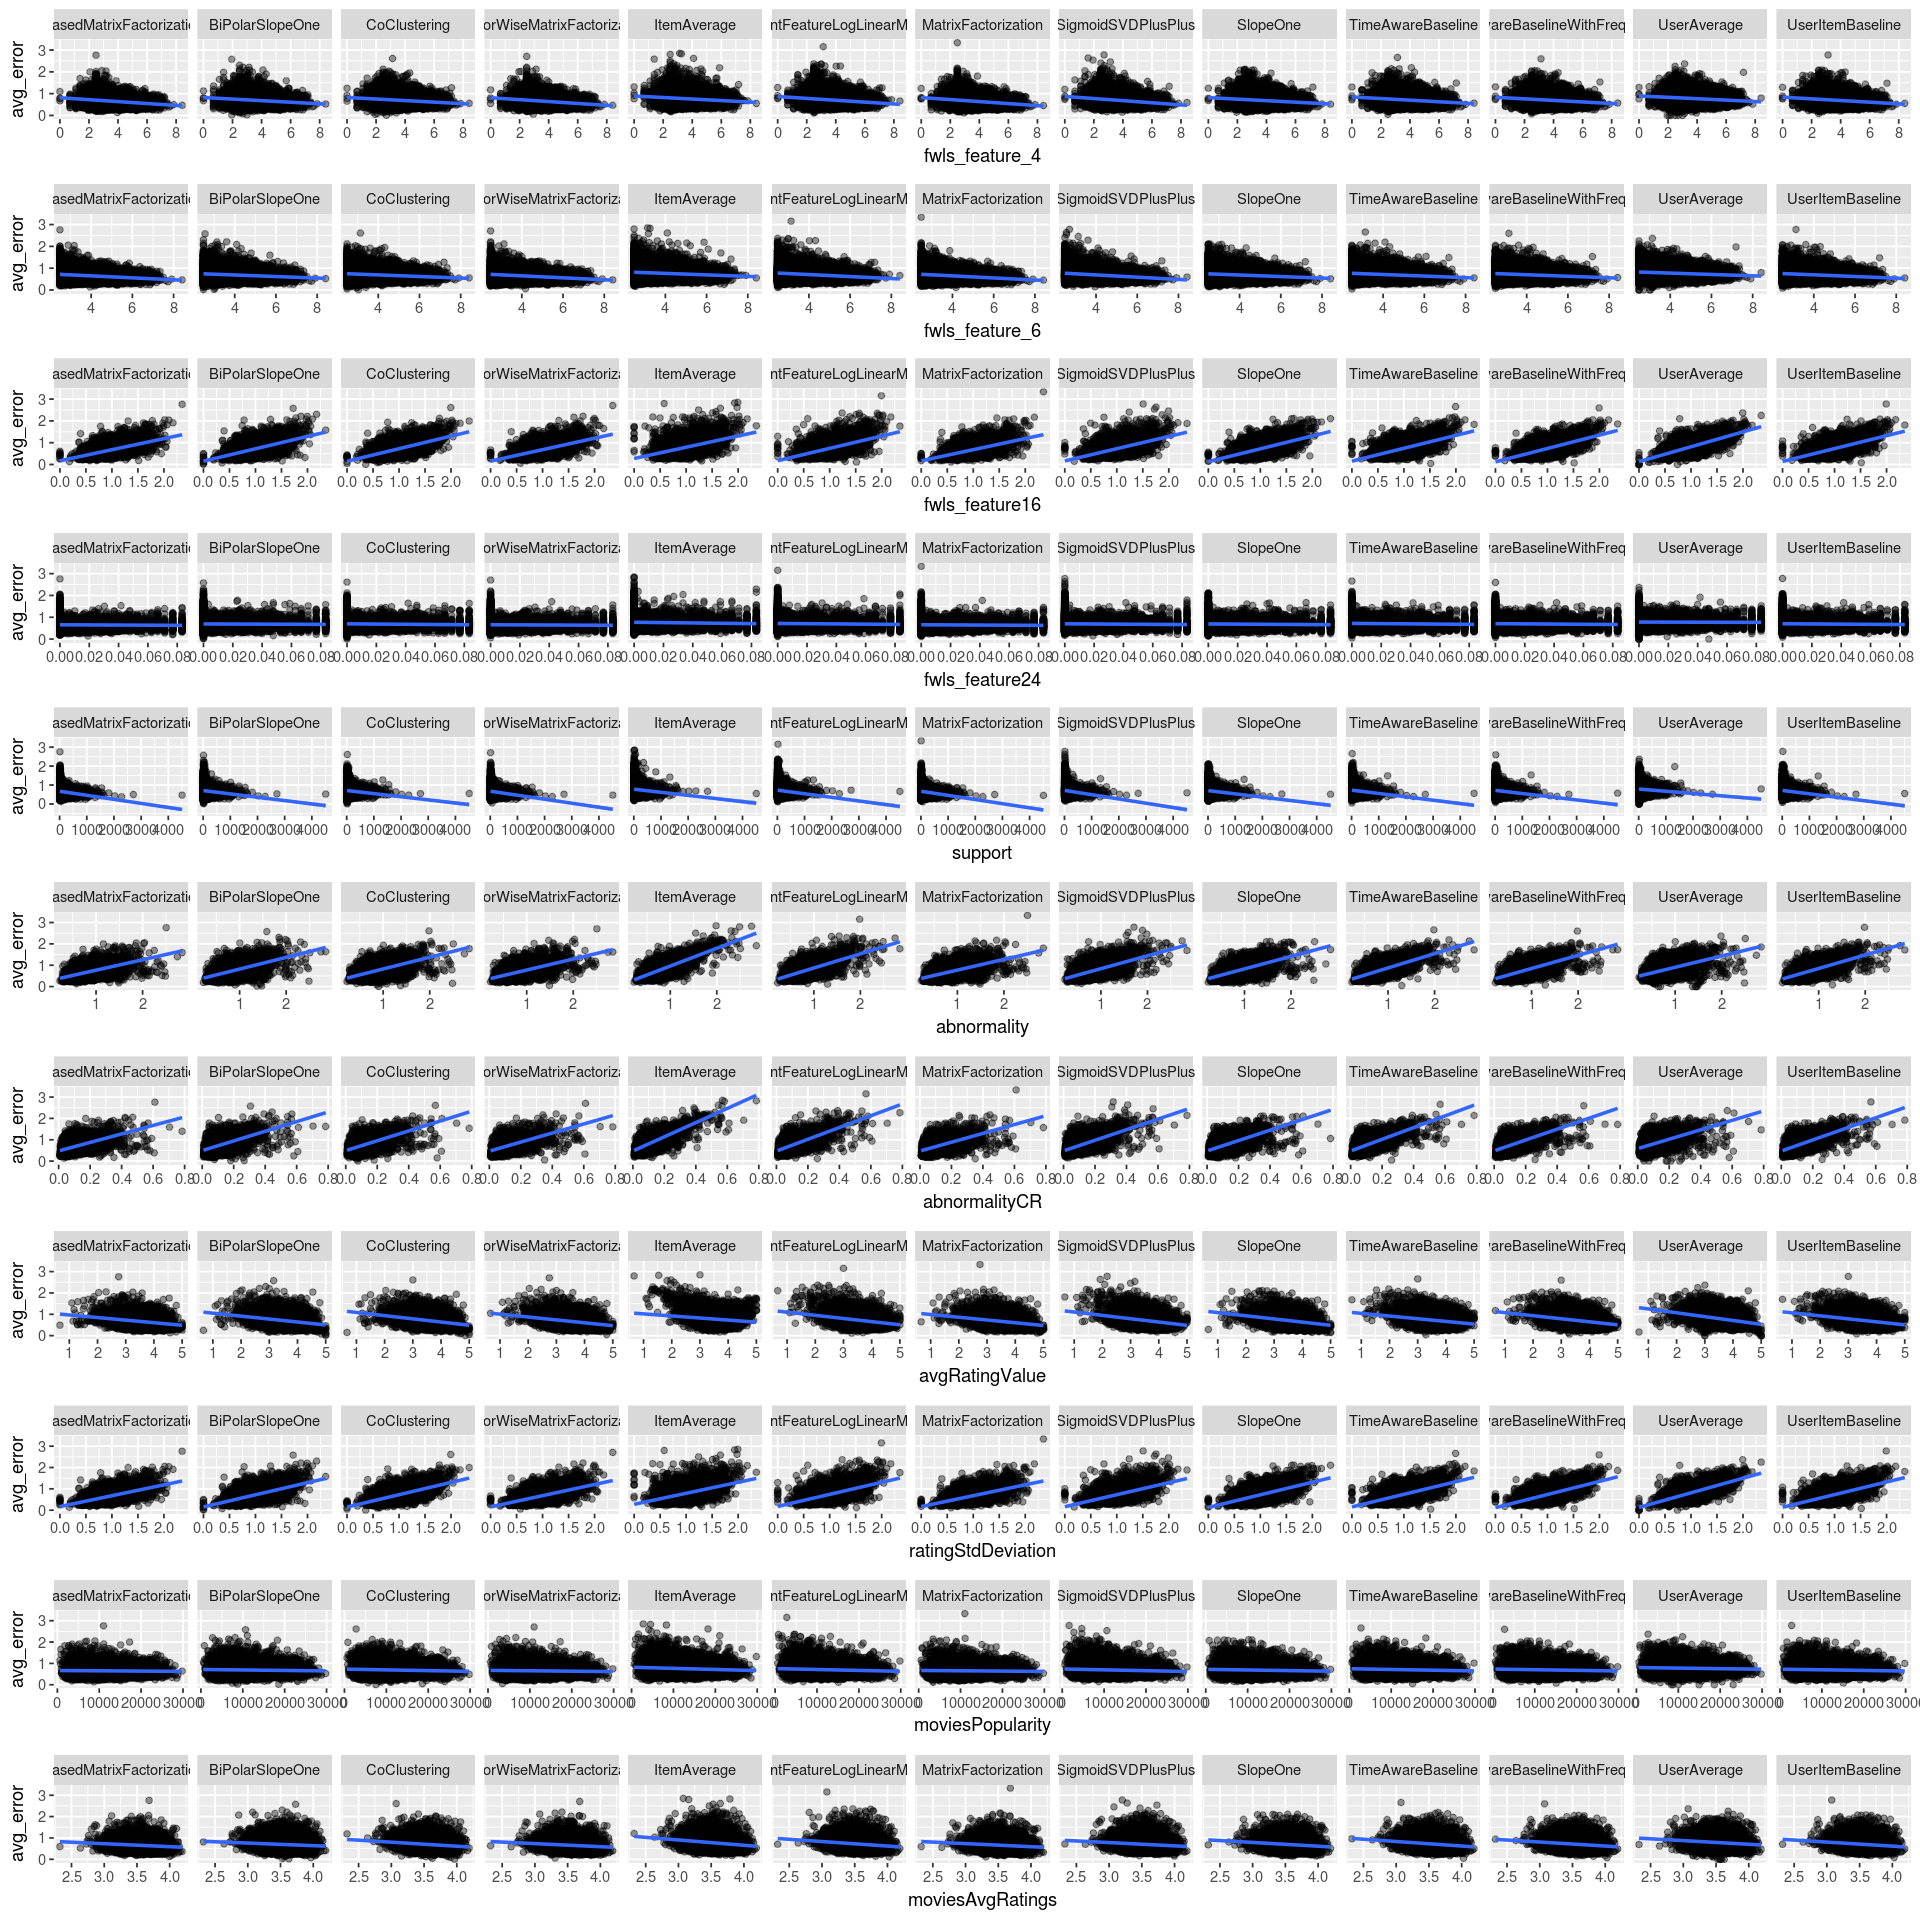

In [18]:
### VISUALIZACAO 2 ###

user_features_df = read.csv("/home/guz/personal/msc-gustavo-penha/data/created/user_features.csv")
# library(GGally)
# library(ggplot2)
# ggpairs(user_features_df[0:10,2:5])

df_joined = merge(df_errors,user_features_df, by="userId")
options(repr.plot.width=16, repr.plot.height=16)

sample_size = 179000
g1 <- ggplot(df_joined[0:sample_size,],aes(x =fwls_feature_4 , y = avg_error)) + 
  geom_point(alpha=0.4) + facet_grid(.~ RS) + geom_smooth(method = lm)
g2 <- ggplot(df_joined[0:sample_size,],aes(x =fwls_feature_6 , y = avg_error)) + 
  geom_point(alpha=0.4) + facet_grid(.~ RS) + geom_smooth(method = lm)
g3 <- ggplot(df_joined[0:sample_size,],aes(x =fwls_feature16 , y = avg_error)) + 
  geom_point(alpha=0.4) + facet_grid(.~ RS) + geom_smooth(method = lm)
g4 <- ggplot(df_joined[0:sample_size,],aes(x =fwls_feature24 , y = avg_error)) + 
  geom_point(alpha=0.4) + facet_grid(.~ RS) + geom_smooth(method = lm)
g5 <- ggplot(df_joined[0:sample_size,],aes(x =support , y = avg_error)) + 
  geom_point(alpha=0.4) + facet_grid(.~ RS) + geom_smooth(method = lm)
g6 <- ggplot(df_joined[0:sample_size,],aes(x =abnormality , y = avg_error)) + 
  geom_point(alpha=0.4) + facet_grid(.~ RS) + geom_smooth(method = lm)
g7 <- ggplot(df_joined[0:sample_size,],aes(x =abnormalityCR , y = avg_error)) + 
  geom_point(alpha=0.4) + facet_grid(.~ RS) + geom_smooth(method = lm)
g8 <- ggplot(df_joined[0:sample_size,],aes(x =avgRatingValue , y = avg_error)) + 
  geom_point(alpha=0.4) + facet_grid(.~ RS) + geom_smooth(method = lm)
g9 <- ggplot(df_joined[0:sample_size,],aes(x =ratingStdDeviation , y = avg_error)) + 
  geom_point(alpha=0.4) + facet_grid(.~ RS) + geom_smooth(method = lm)
g10 <- ggplot(df_joined[0:sample_size,],aes(x =moviesPopularity , y = avg_error)) + 
  geom_point(alpha=0.4) + facet_grid(.~ RS) + geom_smooth(method = lm)
g11 <- ggplot(df_joined[0:sample_size,],aes(x =moviesAvgRatings , y = avg_error)) + 
  geom_point(alpha=0.4) + facet_grid(.~ RS) + geom_smooth(method = lm)
grid.arrange(g1,g2,g3,g4,g5,g6,g7,g8,g9,g10,g11, ncol = 1)

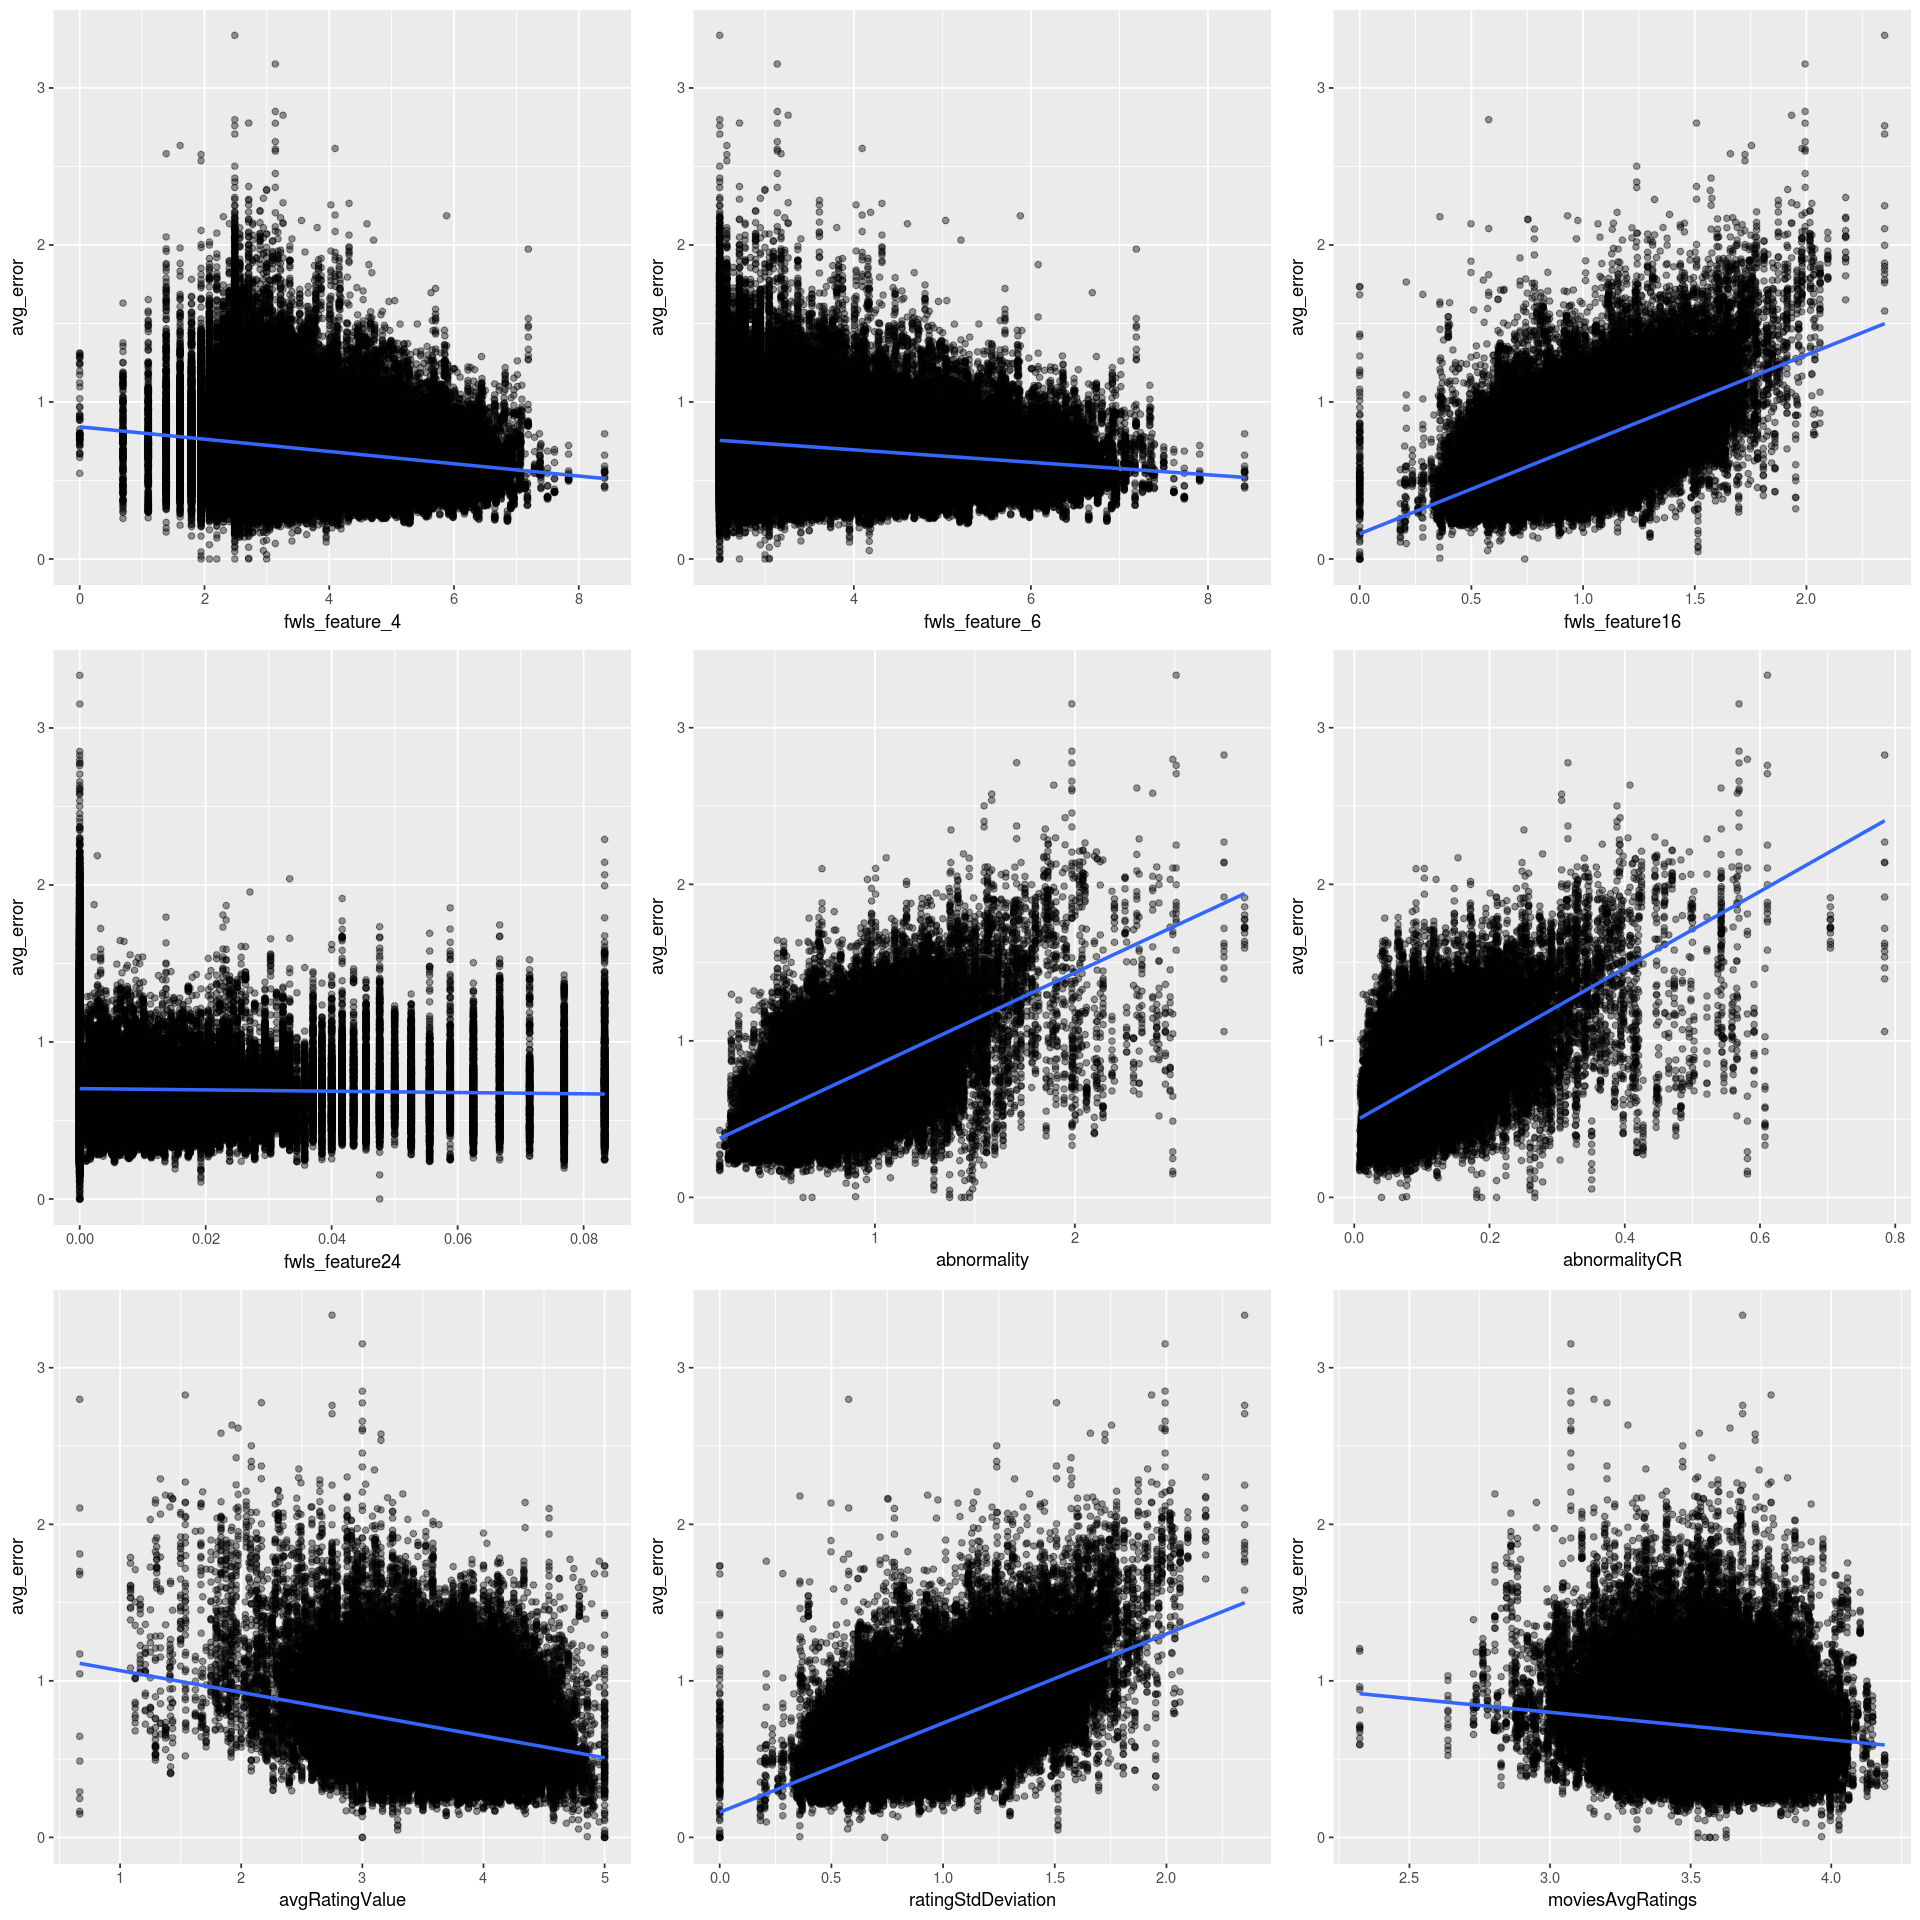

In [44]:
options(repr.plot.width=16, repr.plot.height=16)
g1 <- ggplot(df_joined[0:sample_size,],aes(x =fwls_feature_4 , y = avg_error)) + 
  geom_point(alpha=0.4) + geom_smooth(method = lm)
g2 <- ggplot(df_joined[0:sample_size,],aes(x =fwls_feature_6 , y = avg_error)) + 
  geom_point(alpha=0.4) + geom_smooth(method = lm)
g3 <- ggplot(df_joined[0:sample_size,],aes(x =fwls_feature16 , y = avg_error)) + 
  geom_point(alpha=0.4)  + geom_smooth(method = lm)
g4 <- ggplot(df_joined[0:sample_size,],aes(x =fwls_feature24 , y = avg_error)) + 
  geom_point(alpha=0.4) + geom_smooth(method = lm)
g5 <- ggplot(df_joined[0:sample_size,],aes(x =support , y = avg_error)) + 
  geom_point(alpha=0.4)  + geom_smooth(method = lm)
g6 <- ggplot(df_joined[0:sample_size,],aes(x =abnormality , y = avg_error)) + 
  geom_point(alpha=0.4) + geom_smooth(method = lm)
g7 <- ggplot(df_joined[0:sample_size,],aes(x =abnormalityCR , y = avg_error)) + 
  geom_point(alpha=0.4)  + geom_smooth(method = lm)
g8 <- ggplot(df_joined[0:sample_size,],aes(x =avgRatingValue , y = avg_error)) + 
  geom_point(alpha=0.4) + geom_smooth(method = lm)
g9 <- ggplot(df_joined[0:sample_size,],aes(x =ratingStdDeviation , y = avg_error)) + 
  geom_point(alpha=0.4)  + geom_smooth(method = lm)
g10 <- ggplot(df_joined[0:sample_size,],aes(x =moviesPopularity , y = avg_error)) + 
  geom_point(alpha=0.4)  + geom_smooth(method = lm)
g11 <- ggplot(df_joined[0:sample_size,],aes(x =moviesAvgRatings , y = avg_error)) + 
  geom_point(alpha=0.4) + geom_smooth(method = lm)
grid.arrange(g1,g2,g3,g4,g6,g7,g8,g9,g11, ncol = 3, nrow=3)

In [19]:
df_joined[0:2,]

userId avg_error RS                          abnormality abnormalityCR
1 1      0.3366423 BiasedMatrixFactorization   0.4365607   0.0282768    
2 1      0.3773477 LatentFeatureLogLinearModel 0.4365607   0.0282768    
  avgRatingValue fwls_feature16 fwls_feature24 fwls_feature_4 fwls_feature_6
1 3.709524       0.3520609      0              4.644391       4.65396       
2 3.709524       0.3520609      0              4.644391       4.65396       
  moviesAvgRatings moviesPopularity ratingStdDeviation support
1 3.575774         8526.429         0.3520609          105    
2 3.575774         8526.429         0.3520609          105

In [40]:
print("Overall feature correlation with errors (using all RS)")
correlations = cor(df_joined[sapply(df_joined, is.numeric)])

cors = data.frame(correlations[2:2,])
colnames(cors) <- c("Correlation to errors")
cors

[1] "Overall feature correlation with errors (using all RS)"


Correlation to errors
userId              0.00210005          
avg_error           1.00000000          
abnormality         0.61294151          
abnormalityCR       0.60781815          
avgRatingValue     -0.27531256          
fwls_feature16      0.60726960          
fwls_feature24     -0.03814589          
fwls_feature_4     -0.19465821          
fwls_feature_6     -0.18046562          
moviesAvgRatings   -0.16510236          
moviesPopularity   -0.07277062          
ratingStdDeviation  0.60726960          
support            -0.11336663

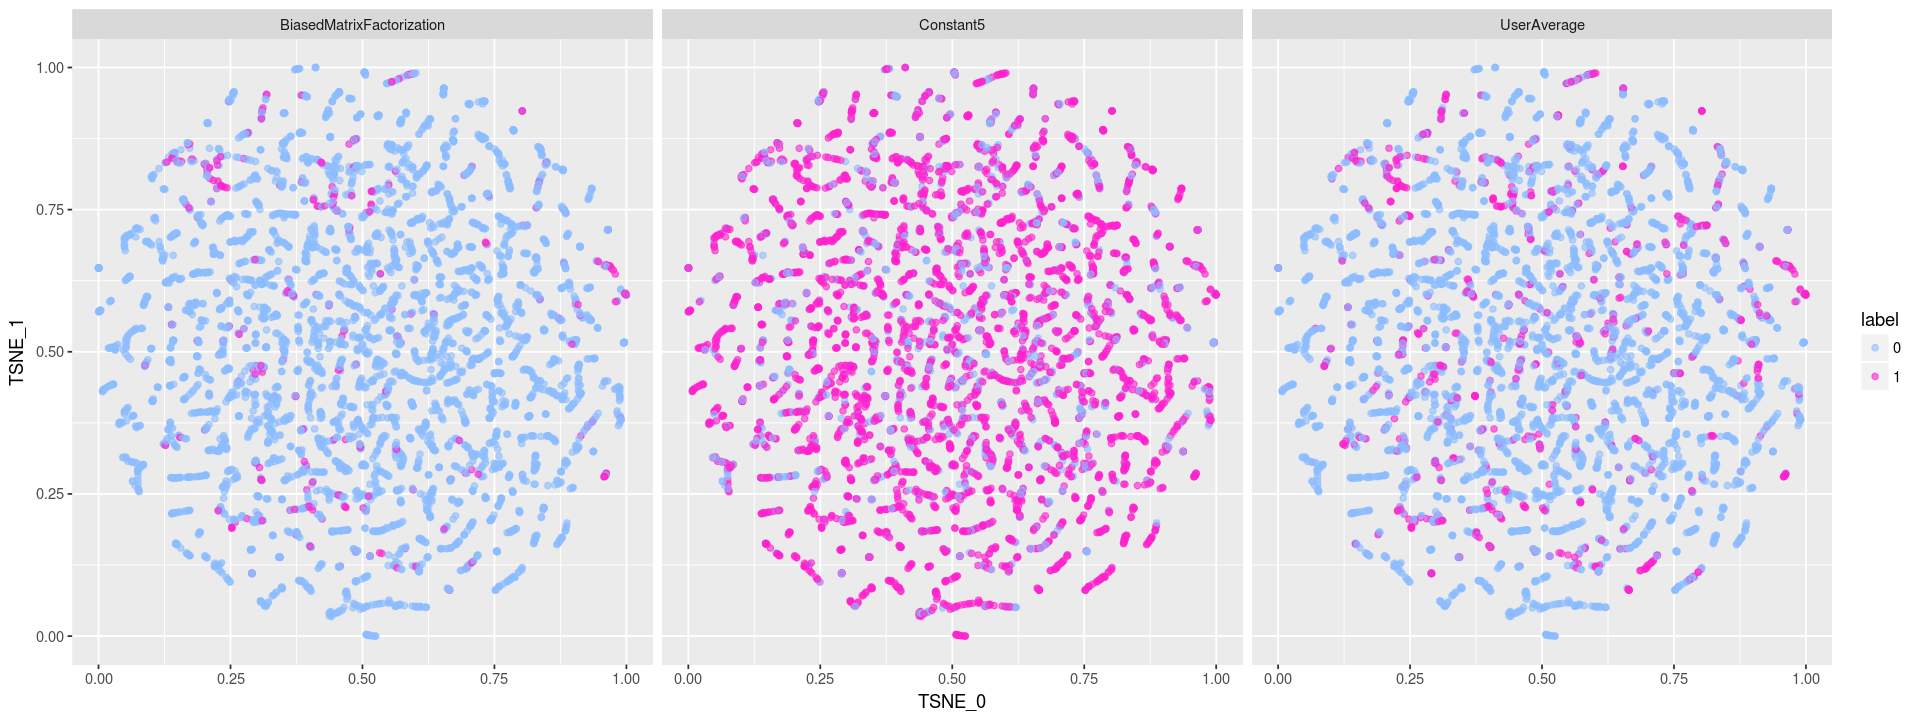

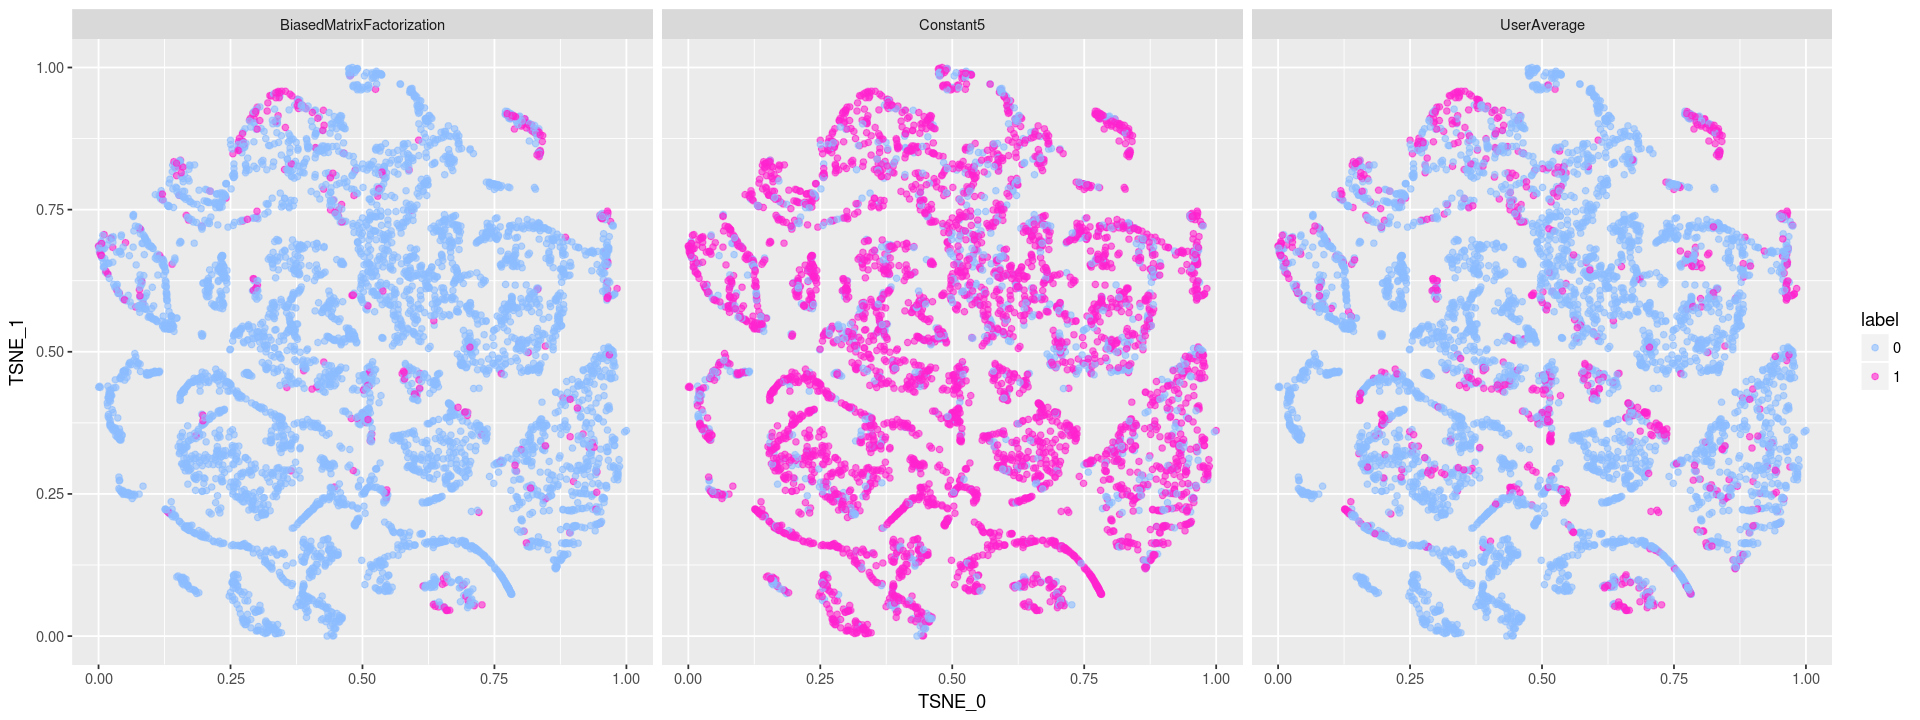

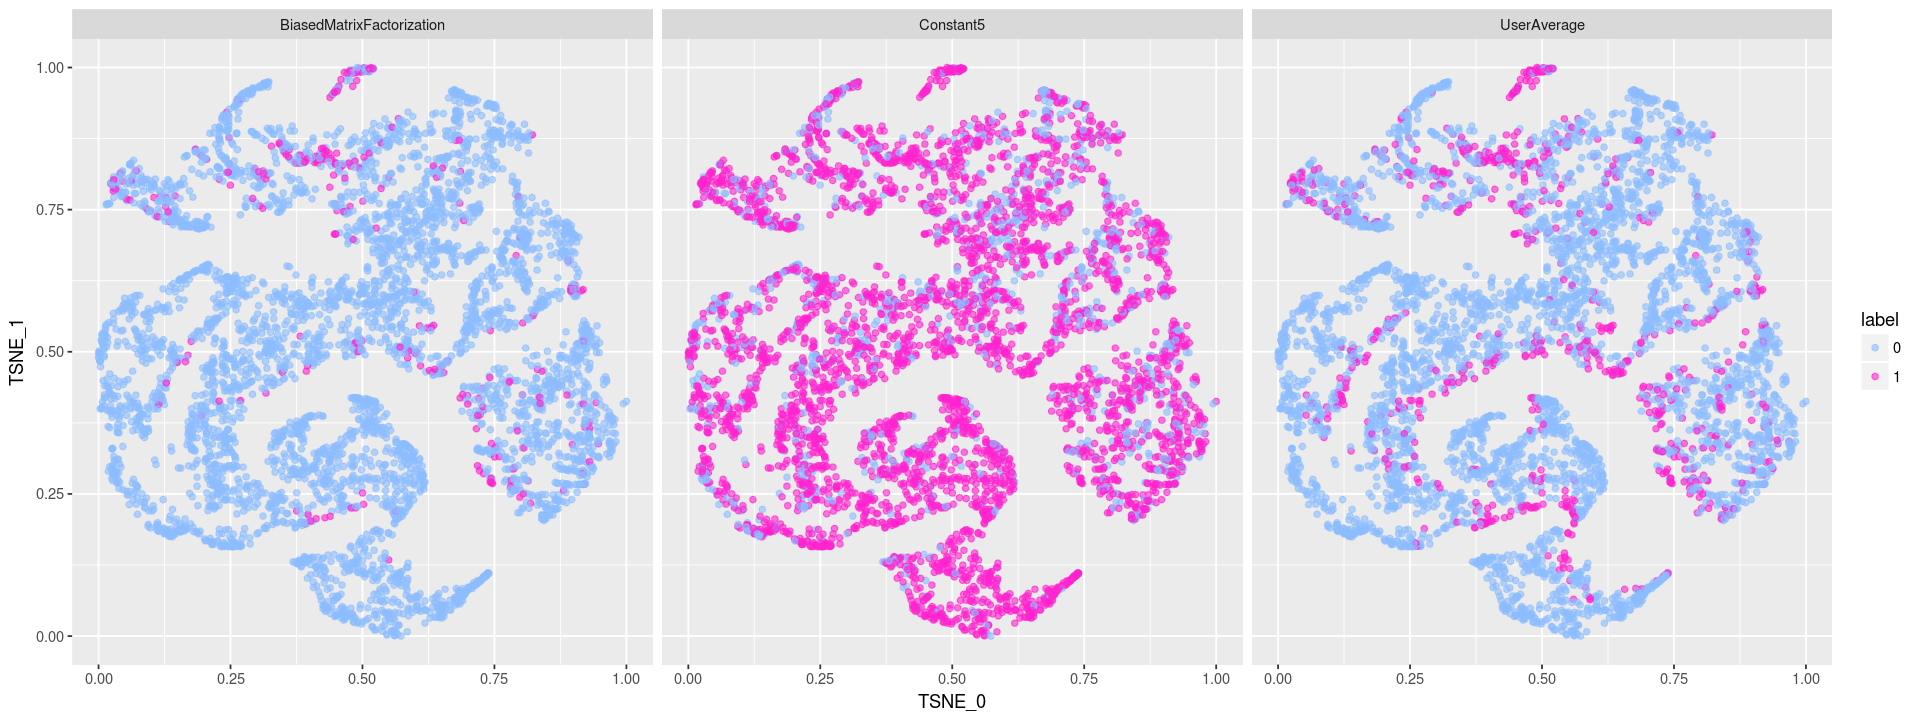

In [11]:
### VISUALIZACAO 3 ###
user2d_df = read.csv("/home/guz/personal/msc-gustavo-penha/data/created/user_2d.csv")
user2d_df = user2d_df[user2d_df$perplexity==5,]
user2d_df = user2d_df[(user2d_df$RS== "Constant5")  | (user2d_df$RS== "UserAverage") | (user2d_df$RS== "BiasedMatrixFactorization") ,]

user2d_df$label = as.character(user2d_df$label)
ggplot(user2d_df,aes(x=TSNE_0,y=TSNE_1,color=label)) + geom_point(alpha = 0.6) + facet_grid(. ~ RS) + scale_color_manual(values= c("#8cbdff","#ff23cf"))

user2d_df = read.csv("/home/guz/personal/msc-gustavo-penha/data/created/user_2d.csv")
user2d_df = user2d_df[user2d_df$perplexity==25,]
user2d_df = user2d_df[(user2d_df$RS== "Constant5")  | (user2d_df$RS== "UserAverage") | (user2d_df$RS== "BiasedMatrixFactorization") ,]

user2d_df$label = as.character(user2d_df$label)
ggplot(user2d_df,aes(x=TSNE_0,y=TSNE_1,color=label)) + geom_point(alpha = 0.6) + facet_grid(. ~ RS) + scale_color_manual(values= c("#8cbdff","#ff23cf"))

user2d_df = read.csv("/home/guz/personal/msc-gustavo-penha/data/created/user_2d.csv")
user2d_df = user2d_df[user2d_df$perplexity==50,]
user2d_df = user2d_df[(user2d_df$RS== "Constant5")  | (user2d_df$RS== "UserAverage") | (user2d_df$RS== "BiasedMatrixFactorization") ,]

user2d_df$label = as.character(user2d_df$label)
ggplot(user2d_df,aes(x=TSNE_0,y=TSNE_1,color=label)) + geom_point(alpha = 0.6) + facet_grid(. ~ RS) + scale_color_manual(values= c("#8cbdff","#ff23cf"))